# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns


# Data Collection

In [2]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis and Data Preprocessing

In [4]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
columns_to_drop =['Year_of_Release' ,'Developer','Publisher','Platform' ]
data.drop(columns_to_drop, axis=1 , inplace=True)

In [6]:
data

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      6704
User_Count      9129
Rating          6769
dtype: int64

In [8]:
data['User_Score'].dtype

dtype('O')

In [9]:
for i in range(len(data['User_Score'])):
    if type(data['User_Score'].iloc[i])==type("string") and data['User_Score'].iloc[i] !='tbd':
        data.loc[i,'User_Score']= float(data['User_Score'].iloc[i])
    if data['User_Score'].iloc[i]=='tbd':
        data.loc[i,'User_Score'] = 0.0

In [11]:
imputer = SimpleImputer(strategy='mean')
data.iloc[:,[7,8,9,10]]= imputer.fit_transform(data.iloc[:,[7,8,9,10]])
data.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,NaN


In [12]:
data.isnull().sum()

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating          6769
dtype: int64

In [13]:
imputer = SimpleImputer(strategy='constant',fill_value='NA')
data.iloc[:,[0,1,11]]= imputer.fit_transform(data.iloc[:,[0,1,11]])
data.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,NA
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,NA


In [14]:
data.isnull().sum()

Name            0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Rating          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16719 non-null  object 
 1   Genre         16719 non-null  object 
 2   NA_Sales      16719 non-null  float64
 3   EU_Sales      16719 non-null  float64
 4   JP_Sales      16719 non-null  float64
 5   Other_Sales   16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  16719 non-null  float64
 8   Critic_Count  16719 non-null  float64
 9   User_Score    16719 non-null  float64
 10  User_Count    16719 non-null  float64
 11  Rating        16719 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [16]:
data['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
NA                 2
Name: Genre, dtype: int64

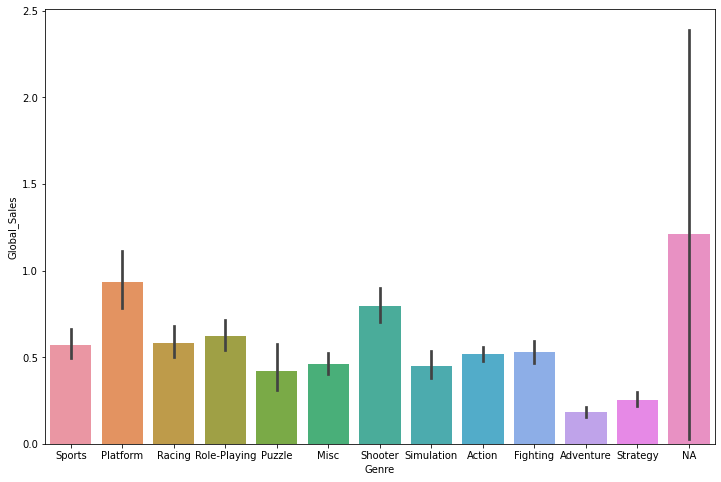

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(x = data['Genre'], y=data['Global_Sales'])
plt.show()

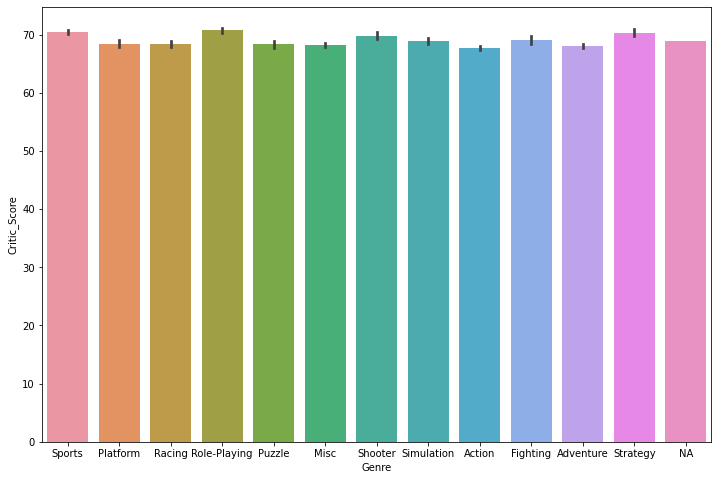

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['Genre'],y= data['Critic_Score'])
plt.show()

In [20]:
data.groupby('Genre')['Critic_Score'].mean()

Genre
Action          67.656132
Adventure       68.066251
Fighting        69.088078
Misc            68.265909
NA              68.967679
Platform        68.458741
Puzzle          68.371541
Racing          68.371187
Role-Playing    70.778226
Shooter         69.833522
Simulation      68.827378
Sports          70.493484
Strategy        70.346538
Name: Critic_Score, dtype: float64

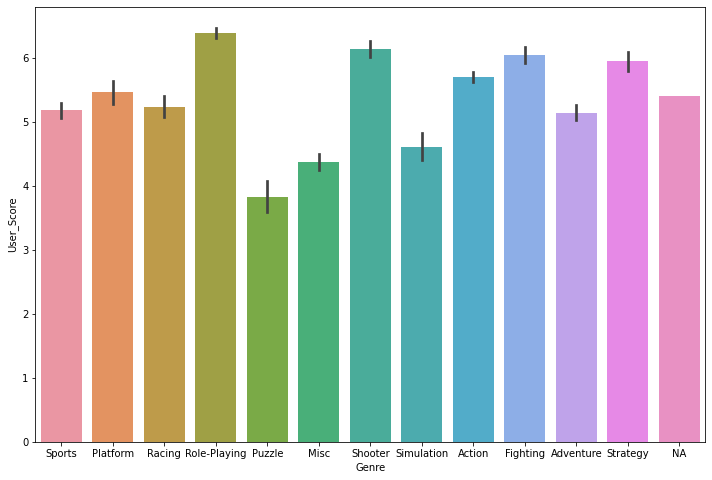

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x= data['Genre'],y = data['User_Score'])
plt.show()

In [23]:
data.groupby('Genre')['User_Score'].mean()

Genre
Action          5.695632
Adventure       5.139939
Fighting        6.045962
Misc            4.370478
NA              5.399810
Platform        5.471103
Puzzle          3.827163
Racing          5.232289
Role-Playing    6.391308
Shooter         6.142587
Simulation      4.612179
Sports          5.183493
Strategy        5.954520
Name: User_Score, dtype: float64

In [24]:
rp = data.iloc[:,2:11]
rp.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
1,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908
2,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
3,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000
4,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908


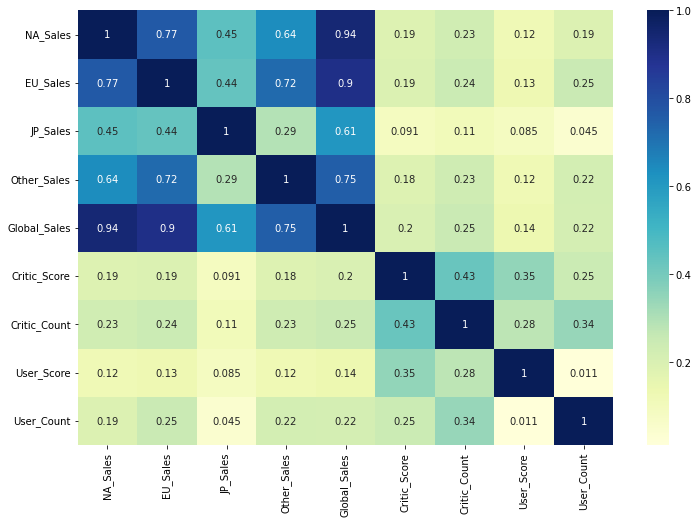

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(rp.corr(),cmap='YlGnBu' , annot=True)
plt.show()

In [27]:
data.replace({'Genre':{'Sports':0,'Platform':1 , 'Racing':2,'Role-Playing':3,'Puzzle':4 ,'Misc':5,'Shooter':6,'Simulation':7,'Action':8,'Fighting':9,'Adventure':10,'Strategy':11,'NA':12}},inplace=True)

In [28]:
x= data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y= data['Global_Sales']
x.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
1,Super Mario Bros.,1,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908
2,Mario Kart Wii,2,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
3,Wii Sports Resort,0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000
4,Pokemon Red/Pokemon Blue,3,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908


In [29]:
x['User_Score']= pd.to_numeric(x['User_Score'],errors='coerce')
x['User_Score']= x['User_Score'].fillna(0).astype(int)

C:\Users\91960\AppData\Local\Temp\ipykernel_18812\1862655886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['User_Score']= pd.to_numeric(x['User_Score'],errors='coerce')
C:\Users\91960\AppData\Local\Temp\ipykernel_18812\1862655886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['User_Score']= x['User_Score'].fillna(0).astype(int)


# Data Splitting

In [30]:
x_train , x_test, y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
game_train = x_train.iloc[:,[0]]
game_test = x_test.iloc[:,[0]]
game_train

,Name
12675,Mayhem 3D
7025,Wipeout 2
11557,Bleach: Erabareshi Tamashii
11746,Rayman Origins
16042,Oyaku de Asoberu DS Ehon: Ukkari Penelope
...,...
9225,Dead Island Definitive Collection
13123,Monster 4x4: Masters of Metal
9845,Sonic Adventure 2
10799,Ar tonelico: Melody of Elemia


In [32]:
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

In [33]:
x_train.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
12675,2,0.05,0.00,0.00,0.01,0.06,53.000000,5.000000,0,162.229908
7025,5,0.22,0.00,0.00,0.01,0.23,68.967679,26.360821,0,162.229908
11557,10,0.00,0.00,0.08,0.00,0.08,68.967679,26.360821,5,162.229908
11746,1,0.00,0.06,0.00,0.01,0.08,86.000000,11.000000,8,337.000000
16042,7,0.00,0.00,0.02,0.00,0.02,68.967679,26.360821,5,162.229908


# Model Training

In [36]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 200 , learning_rate= 0.08)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
y_pred = model.predict(x_test)
y_pred

array([0.18978006, 0.4097839 , 0.2800186 , ..., 0.07001244, 0.20025638,
       0.06001753], dtype=float32)

# Prediction

In [43]:
y_pred = y_pred.reshape(-1,1)
y_test= y_test.reshape(-1,1)
predictions = np.concatenate([game_test,y_pred,y_test],axis=1)
predictions = pd.DataFrame(predictions,columns=['Name','Predicted_Global_Sales','Actual_Global_Sales'])

In [45]:
predictions.head(20)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,R-Type Final,0.18978,0.19
1,The Terminator: Dawn of Fate,0.409784,0.41
2,Dead to Rights: Retribution,0.280019,0.28
3,Skylanders SWAP Force,2.148009,2.15
4,DiRT,1.050514,1.05
5,Robotics;Notes,0.02006,0.02
6,Combat Wings: The Great Battles of WWII,0.030033,0.03
7,Nicola Kanshuu: Model Oshare * Audition Platina,0.08001,0.08
8,Lego Batman 3: Beyond Gotham,0.299916,0.3
9,SpongeBob SquarePants: Battle for Bikini Bottom,1.664856,1.67


In [55]:
from sklearn.metrics import r2_score , mean_squared_error
import math
r2_score = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(f"r2 score of model is : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model :{rmse:.3f}" )

r2 score of model is : 0.993
Root Mean Squared Error of the model :0.114
